# HW8: Ada Boost for Committee Training of Nonlinearly Separable Classifiers

Blanca Miller

STAT 760

04.12.2018

__Objective:__ Place a cirlce inside of a square, and train a committee of classifiers using the adaptive boosting algorithm to make random cuts in the square. 
 
__Ada Boost:__ Ada boost is a three step algorithm that generates a robust and generalizable committee of classifiers from a given set of classifiers. The algorithm executes as follows,

For the number of classifiers we want, M, we compute i = 0...M iterations:

1. Select classifier, k_m, from the set of classifiers, that minimizes the weighted sum error:
        w_e = sum w_i^(m)
   - classifier failures are recorded with a 0
   - classifier successes are recorded wiht a 1


2. Set the weight α_m for the chosen weak classifier to 
        α_m = 1/2 * ln((1-e_m)/e_m) where em = W_e/W

3. Update the weight of the data points for the next iteration. If k_m(x_i) is 
   - a miss, set w_i^(m+1) = w_i^(m) * e^α_m = w_i^(m) * sqrt((1-e_m)/e_m)
   - a hit, set w_i^(m+1) = w_i^(m) * e^-α_m = w_i^(m) * sqrt(e_m/(1-e_m))











1. Scouting: Build an evaluative matrix given the classifier set using data and corresponding labels where the rows represent a data input and the columns represent a classifier, then
        - classifier failures are recorded with a 0
        - classifier successes are recorded wiht a 1 
        
    Initially each classifier is assigned a weight of α=1. But, with each evaluative matrix iteration vary the weights of the classifier to focus on those that correctly classify. The classifier with the worst performance see substantial increases in weight value, e^β, while classifiers with the best performance see small increase in weight value, e^-β.
    
    
    and bring additional insight to classifying than the other classifiers. 
    2. Drafting: Rank each classifier with each iteration through the classifier set to identify the best experts in the pool. Computer the error to get teh classifier wiht the next smallest error. 
    
    3. Update the weights. 
        - Miss: w_i^(m+1) = w_i^(m) * e^α_m  
        - Hit: w_i^(m+1) = w_i^(m) * e^-α_m
        - Error: w_n * e-α_m + w_e * e^α_m
        - dError/dα_m = 1/2 * ln(1-e_m/e_m)
    
    4. Iterate.

Error criterion: exponential loss function for β > 0 and e^-β < e^β where 
- the cost of classifier failure is e^β and 
- the cost of classifier success is e^-β 
Thus, a failure is much more heavily penalized than a hit.

References:
1. R. Rojas, 2009, AdaBoost & the Super Bowl of Classifiers A Tutorial Introduction to Adaptive Boosting
http://www.inf.fu-berlin.de/inst/ag-ki/rojas_home/documents/tutorials/adaboost4.pdf
2. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

### Construct Datasets: Circle & Square

In [2]:
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)

In [3]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

Text(0.5,1,u'Binary Classification')

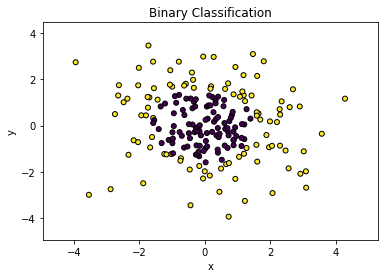

In [4]:
# Plot the training points
plt.scatter(X1[:, 0], X1[:, 1], marker='o', 
                c=y1, s=25, edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Binary Classification')

In [5]:
#plot_colors = "br"
#plot_step = 0.02
#class_names = "AB"
#plt.figure(figsize=(10, 5))